# Train
https://mapreader.readthedocs.io/en/latest/User-guide/Train.html

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Read annotations

In [3]:
from mapreader import loadAnnotations

In [7]:
annotated_images = loadAnnotations()

annotated_images.load("./annotations_one_inch/rail_space_#rw#.csv", 
                      path2dir="./maps/slice_50_50")

* reading: ./annotations_one_inch/rail_space_#rw#.csv
* #rows: 252
* label column name: label (you can change this later by .set_col_label(new_label) )
* shuffle rows: Yes
* update paths in 'image_id' column by inserting './maps/slice_50_50'

------------------------
* Number of annotations: 252

* First few rows:
                                            image_id  label
0  /Users/rwood/LwM/MapReader/worked_examples/geo...      2
1  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
2  /Users/rwood/LwM/MapReader/worked_examples/geo...      2
3  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
4  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
...

* Value counts (column: label):
1    231
2     21
Name: label, dtype: int64
------------------------



In [17]:
annotated_images.annotations

,image_id,label
0,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
1,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
2,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
3,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
4,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
...,...,...
247,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
248,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
249,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
250,/Users/rwood/LwM/MapReader/worked_examples/geo...,0


In [8]:
print(annotated_images)

------------------------
* Number of annotations: 252

* First few rows:
                                            image_id  label
0  /Users/rwood/LwM/MapReader/worked_examples/geo...      2
1  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
2  /Users/rwood/LwM/MapReader/worked_examples/geo...      2
3  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
4  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
...

* Value counts (column: label):
1    231
2     21
Name: label, dtype: int64
------------------------



In [9]:
# Shift labels so that they start from 0
annotated_images.adjust_labels(shiftby=-1)

--------------------
[INFO] value counts before shift:
1    231
2     21
Name: label, dtype: int64
--------------------
[INFO] value counts after shift:
0    231
1     21
Name: label, dtype: int64
--------------------


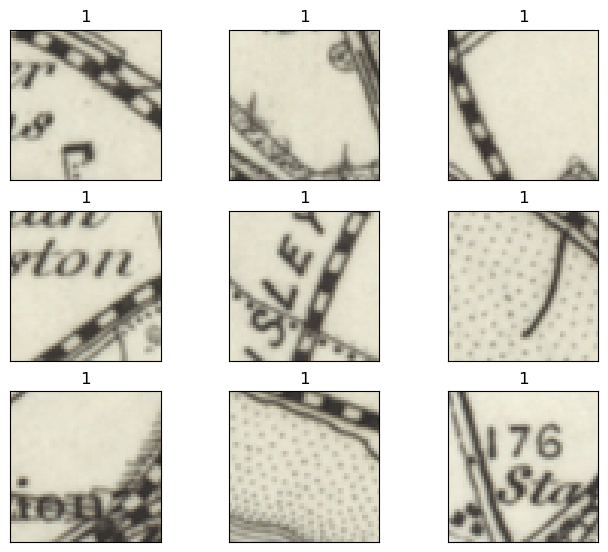

In [11]:
annotated_images.show_image_labels(tar_label=1, num_sample=9)

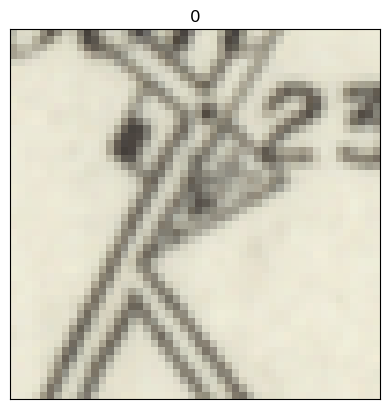

In [12]:
# show an image based on its index 
annotated_images.show_image(indx=14)


******************************
[INFO] review 1-48, total: 252
******************************


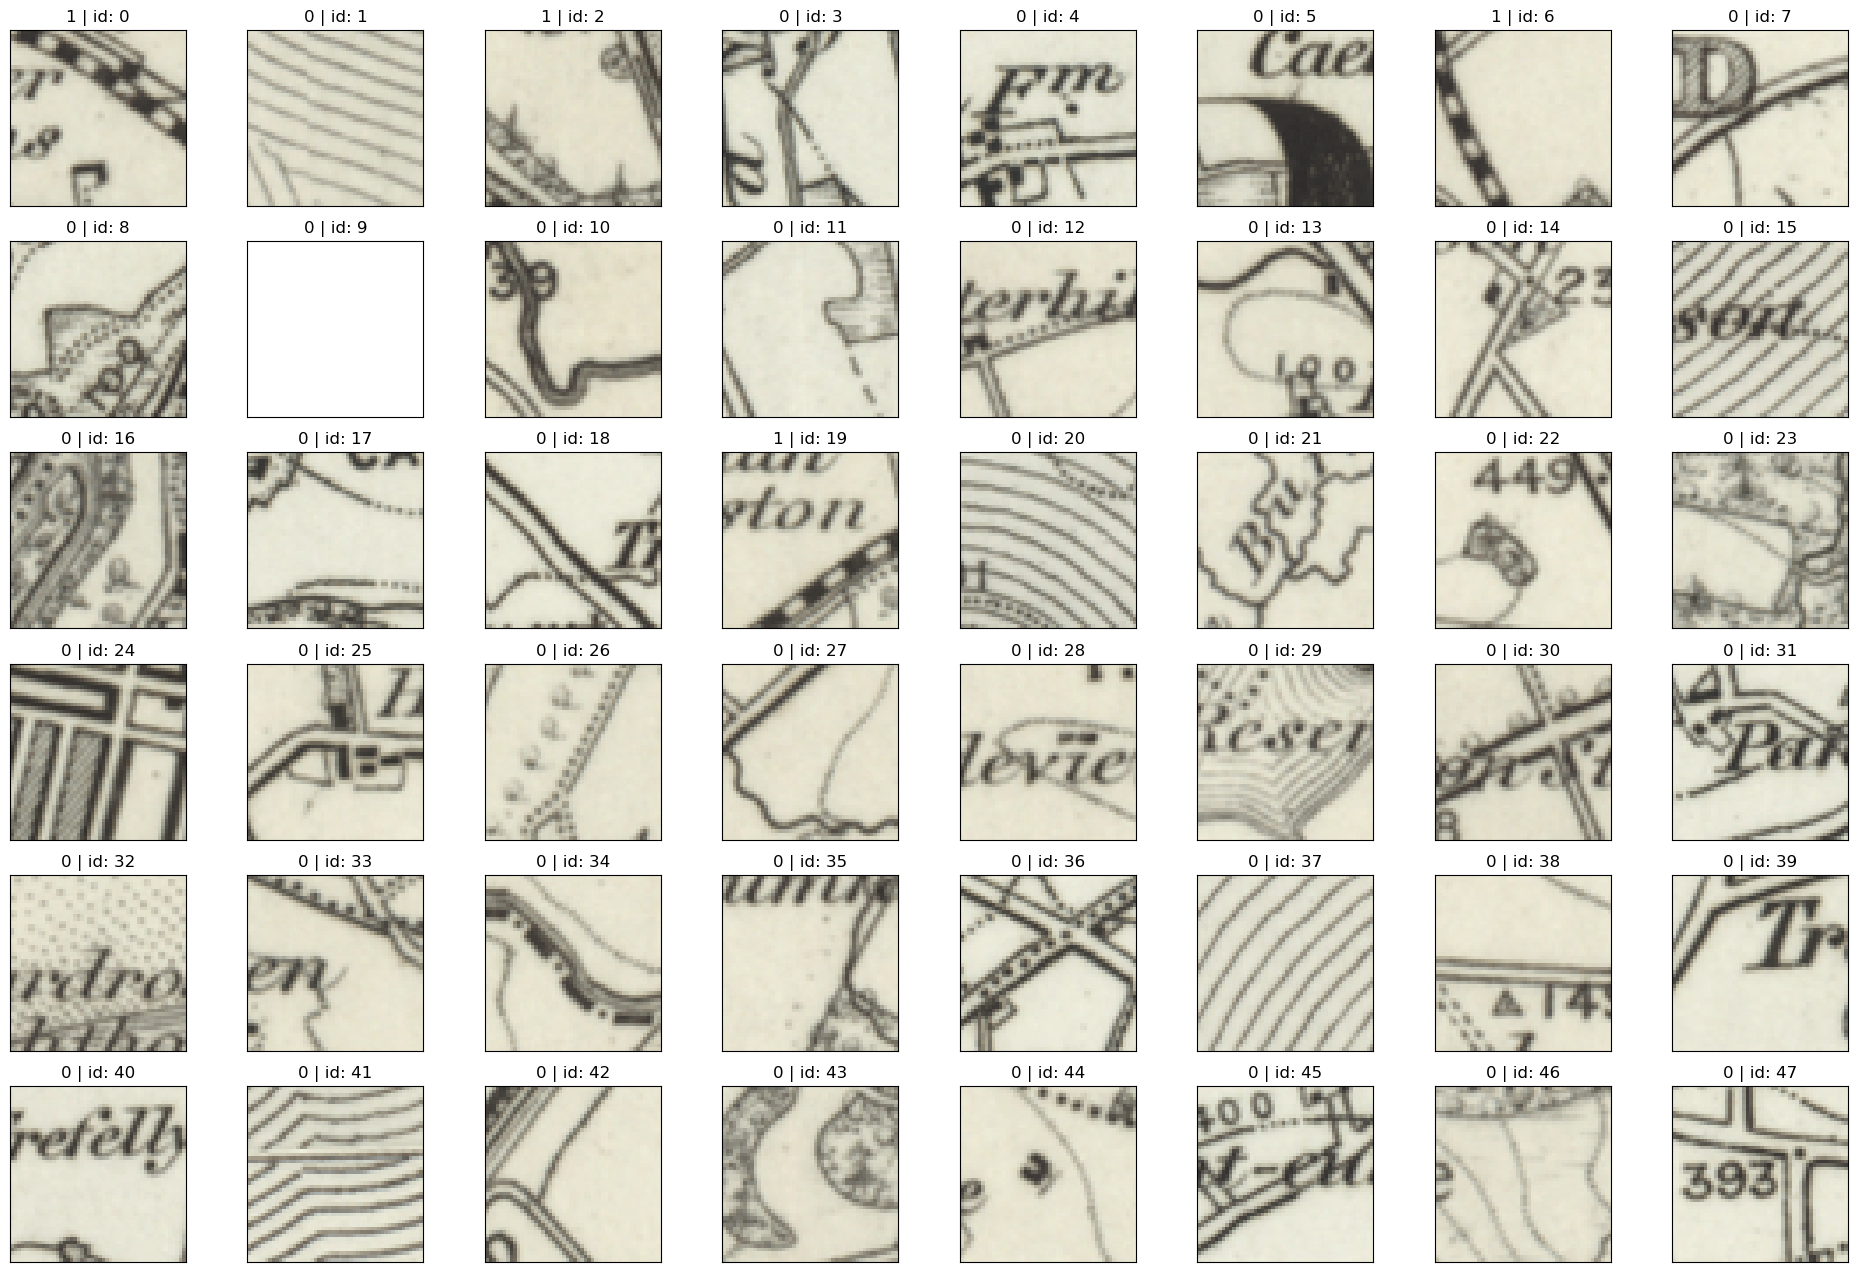

list of IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Enter 'ids', comma separated (or press enter to continue)  :  end
[INFO] Exit...


In [20]:
annotated_images.review_labels()

## Split annotations into train/val/test

In [21]:
annotated_images.split_annotations()

---------------------
* Split dataset into:
    Train: 176
    Valid: 38
    Test : 38
---------------------


In [22]:
annotated_images.train.head()

,image_id,label
90,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
40,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
142,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
180,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
49,/Users/rwood/LwM/MapReader/worked_examples/geo...,0


In [23]:
annotated_images.train["label"].value_counts()

0    161
1     15
Name: label, dtype: int64

In [24]:
annotated_images.val["label"].value_counts()

0    35
1     3
Name: label, dtype: int64

In [25]:
annotated_images.test["label"].value_counts()

0    35
1     3
Name: label, dtype: int64

## Prepare datasets

In [102]:
import numpy as np
from torchvision import transforms
from mapreader import patchTorchDataset

In [32]:
resize = 224

#mean values of 'mean_pixel_R/G/B' and 'std_pixel_R/G/B'
normalize_mean = 1 - np.array([0.791667, 0.781116, 0.716220])
normalize_std = 1 - np.array([0.118752, 0.120394, 0.113254])

data_transforms = transforms.Compose([transforms.Resize(resize), 
                                      transforms.ToTensor(), 
                                      transforms.Normalize(normalize_mean,normalize_std)])


In [37]:
train_dataset = patchTorchDataset(annotated_images.train, transform=data_transforms)
val_dataset = patchTorchDataset(annotated_images.val, transform=data_transforms)
test_dataset  = patchTorchDataset(annotated_images.test, transform=data_transforms)

In [38]:
train_dataset.patchframe

,image_id,label
90,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
40,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
142,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
180,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
49,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
...,...,...
115,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
82,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
79,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
104,/Users/rwood/LwM/MapReader/worked_examples/geo...,1


In [41]:
train_count_list=train_dataset.patchframe["label"].value_counts().to_list()
val_count_list=val_dataset.patchframe["label"].value_counts().to_list()

weights = np.reciprocal(torch.Tensor(train_count_list))
weights = weights.double()

In [45]:
train_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights[train_dataset.patchframe["label"].to_list()], 
    num_samples=len(train_dataset))

valid_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights[val_dataset.patchframe["label"].to_list()], 
    num_samples=len(val_dataset))

## Set up `classifier`

In [ ]:
import torch
from mapreader import classifier

### Load datasets

In [75]:
my_classifier = classifier()

[INFO] Device is set to cpu


In [76]:
batch_size = 8

# Add training dataset
my_classifier.add2dataloader(train_dataset, 
                            set_name="train", 
                            batch_size=batch_size, 
                            shuffle=False,
                            sampler=train_sampler
                           )

# Add validation dataset
my_classifier.add2dataloader(val_dataset, 
                            set_name="val", 
                            batch_size=batch_size, 
                            shuffle=False, 
                            sampler=valid_sampler
                           )

[INFO] added 'train' dataloader with 176 elements.
[INFO] added 'val' dataloader with 38 elements.


In [77]:
my_classifier.dataset_sizes

{'train': 176, 'val': 38}

In [79]:
my_classifier.print_classes_dl('train')

[INFO] labels:      [0, 1]


In [80]:
class_names = {0: "No", 1: "rail space"}
my_classifier.set_classnames(class_names)

my_classifier.print_classes_dl('train')

[INFO] labels:      [0, 1]
[INFO] class-names: {0: 'No', 1: 'rail space'}


[INFO] dataset: train
#samples:    176
#batch size: 8
#batches:    22


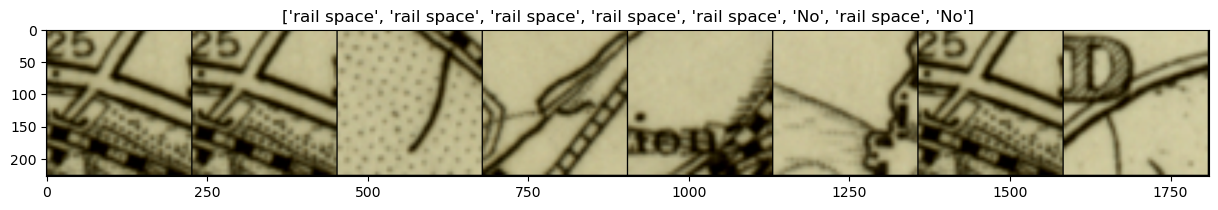

In [81]:
my_classifier.show_sample(set_name='train', batch_number=3)

### Load a (pretrained) PyTorch model

In [82]:
my_classifier.initialize_model("resnet18")

[INFO] labels:      [0, 1]
[INFO] class-names: {0: 'No', 1: 'rail space'}


In [83]:
my_classifier.model_summary()

------------------------------------------------------------------------------------------
|                                  modules |           parameters |                  dim
------------------------------------------------------------------------------------------
|                             conv1.weight |                 9408 |        [64, 3, 7, 7] |
|                               bn1.weight |                   64 |                 [64] |
|                                 bn1.bias |                   64 |                 [64] |
|                    layer1.0.conv1.weight |                36864 |       [64, 64, 3, 3] |
|                      layer1.0.bn1.weight |                   64 |                 [64] |
|                        layer1.0.bn1.bias |                   64 |                 [64] |
|                    layer1.0.conv2.weight |                36864 |       [64, 64, 3, 3] |
|                      layer1.0.bn2.weight |                   64 |                 [64] |
|

### Set up optimisier, scheduler and criterion

In [84]:
params_to_optimise = my_classifier.layerwise_lr(min_lr=1e-4, max_lr=1e-3)

In [85]:
my_classifier.initialize_optimizer(params2optim=params_to_optimise)

In [86]:
my_classifier.initialize_scheduler()

In [87]:
criterion = torch.nn.CrossEntropyLoss()

my_classifier.add_criterion(criterion)

## Train/fine-tune model

**Note:** it is possible to interrupt a training (using Kernel/Interrupt in Jupyter Notebook or ctrl+C). 

In [104]:
my_classifier.train(num_epochs=10, 
                   save_model_dir="./models_tutorial", 
                   tensorboard_path="tboard_tutorial", 
                   verbosity_level=0,
                   tmp_file_save_freq=2,
                   remove_after_load=False,
                   print_info_batch_freq=5)

2023-03-08 10:41:45 JY5FK6W3K5 [INFO] train    -- 11/20 --       8/176 (  4.5%) -- Loss: 0.034
2023-03-08 10:41:46 JY5FK6W3K5 [INFO] train    -- 11/20 --      48/176 ( 27.3%) -- Loss: 0.050
2023-03-08 10:41:47 JY5FK6W3K5 [INFO] train    -- 11/20 --      88/176 ( 50.0%) -- Loss: 0.040
2023-03-08 10:41:49 JY5FK6W3K5 [INFO] train    -- 11/20 --     128/176 ( 72.7%) -- Loss: 0.028
2023-03-08 10:41:50 JY5FK6W3K5 [INFO] train    -- 11/20 --     168/176 ( 95.5%) -- Loss: 0.018
2023-03-08 10:41:50 JY5FK6W3K5 [INFO] train    -- 11/20 -- Loss: 0.086; F_macro: 98.29; R_macro: 98.27
2023-03-08 10:41:50 JY5FK6W3K5 [INFO] val      -- 11/20 --        8/38 ( 21.1%) -- Loss: 0.768
2023-03-08 10:41:51 JY5FK6W3K5 [INFO] val      -- 11/20 -- Loss: 1.417; F_macro: 53.24; R_macro: 60.53

2023-03-08 10:41:51 JY5FK6W3K5 [INFO] train    -- 12/20 --       8/176 (  4.5%) -- Loss: 0.024
2023-03-08 10:41:52 JY5FK6W3K5 [INFO] train    -- 12/20 --      48/176 ( 27.3%) -- Loss: 0.023
2023-03-08 10:41:54 JY5FK6W3K5 [I

2023-03-08 10:42:29 JY5FK6W3K5 [INFO] train    -- 18/20 --       8/176 (  4.5%) -- Loss: 0.027
2023-03-08 10:42:30 JY5FK6W3K5 [INFO] train    -- 18/20 --      48/176 ( 27.3%) -- Loss: 0.005
2023-03-08 10:42:31 JY5FK6W3K5 [INFO] train    -- 18/20 --      88/176 ( 50.0%) -- Loss: 0.024
2023-03-08 10:42:33 JY5FK6W3K5 [INFO] train    -- 18/20 --     128/176 ( 72.7%) -- Loss: 0.006
2023-03-08 10:42:34 JY5FK6W3K5 [INFO] train    -- 18/20 --     168/176 ( 95.5%) -- Loss: 0.007
2023-03-08 10:42:34 JY5FK6W3K5 [INFO] train    -- 18/20 -- Loss: 0.081; F_macro: 97.72; R_macro: 97.80
2023-03-08 10:42:34 JY5FK6W3K5 [INFO] val      -- 18/20 --        8/38 ( 21.1%) -- Loss: 3.845
2023-03-08 10:42:35 JY5FK6W3K5 [INFO] val      -- 18/20 -- Loss: 2.594; F_macro: 33.33; R_macro: 50.00

SAVE temp file: tmp_7081201916_checkpoint.pkl | set .last_epoch: 18
[INFO] SAVE temp file: tmp_7081201916_checkpoint.pkl | set .last_epoch: 18

2023-03-08 10:42:35 JY5FK6W3K5 [INFO] train    -- 19/20 --       8/176 (  4.5%)

In [89]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

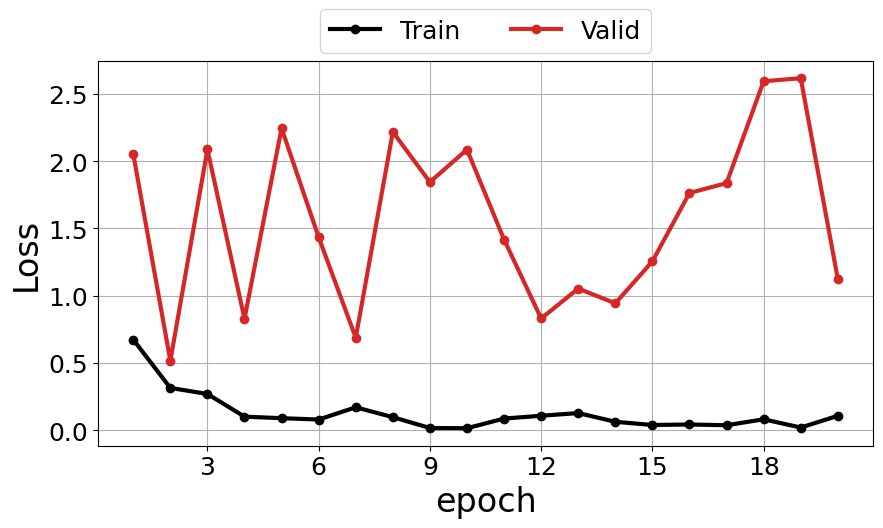

In [105]:
my_classifier.plot_metric(y_axis=["epoch_loss_train", "epoch_loss_val"],
                         y_label="Loss",
                         legends=["Train", "Valid"])

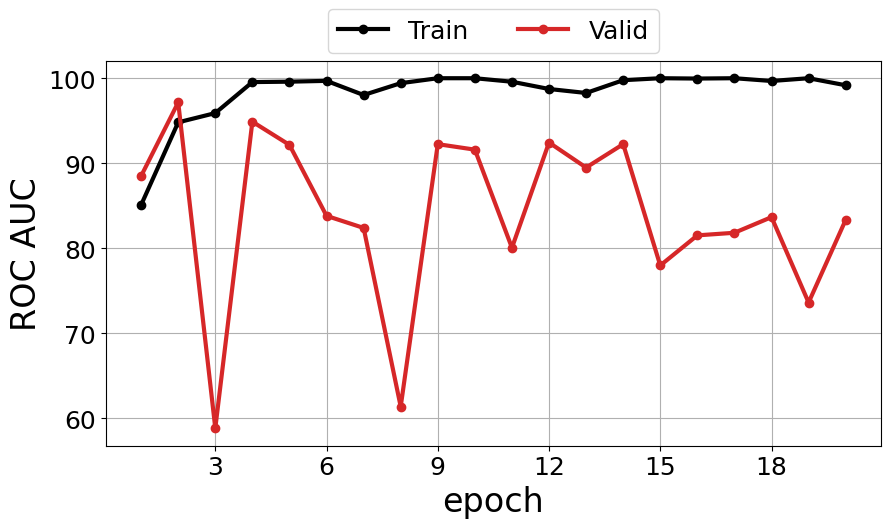

In [106]:
my_classifier.plot_metric(y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
                         y_label="ROC AUC",
                         legends=["Train", "Valid"],
                         colors=["k", "tab:red"])

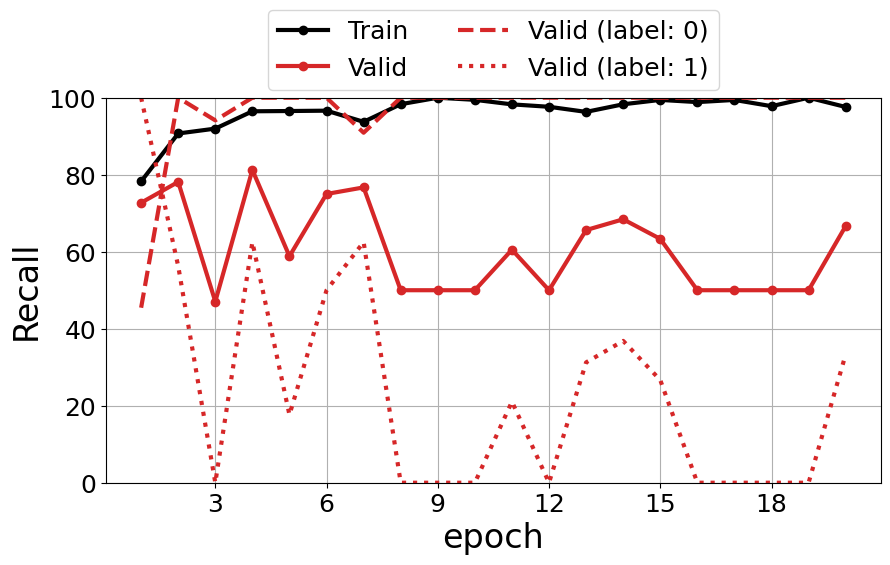

In [107]:
my_classifier.plot_metric(y_axis=["epoch_recall_macro_train", 
                                 "epoch_recall_macro_val", 
                                 "epoch_recall_0_val", 
                                 "epoch_recall_1_val"],
                         y_label="Recall",
                         legends=["Train", 
                                  "Valid", 
                                  "Valid (label: 0)",
                                  "Valid (label: 1)",],
                         colors=["k", "tab:red", "tab:red", "tab:red"],
                         styles=["-", "-", "--", ":"],
                         markers=["o", "o", "", ""],
                         plt_yrange=[0, 100])

## Test model on test set

In [108]:
my_classifier.add2dataloader(test_dataset, 
                            set_name="test", 
                            batch_size=batch_size)

[INFO] added 'test' dataloader with 38 elements.


In [109]:
my_classifier.inference(set_name="test")

2023-03-08 10:42:48 JY5FK6W3K5 [INFO] test     -- 21/21 --        8/38 ( 21.1%) -- 
Total time: 0m 0s


In [110]:
# Calculate metrics using inference outputs
my_classifier.calculate_add_metrics(y_true=my_classifier.orig_label, 
                                   y_pred=my_classifier.pred_label,
                                   y_score=my_classifier.pred_conf,
                                   phase="test")

In [111]:
# list of calculated metrics (for test set):
[k for k in my_classifier.metrics if "test" in k]

['epoch_prec_micro_test',
 'epoch_recall_micro_test',
 'epoch_fscore_micro_test',
 'epoch_supp_micro_test',
 'epoch_rocauc_micro_test',
 'epoch_prec_macro_test',
 'epoch_recall_macro_test',
 'epoch_fscore_macro_test',
 'epoch_supp_macro_test',
 'epoch_rocauc_macro_test',
 'epoch_prec_weighted_test',
 'epoch_recall_weighted_test',
 'epoch_fscore_weighted_test',
 'epoch_supp_weighted_test',
 'epoch_rocauc_weighted_test',
 'epoch_prec_0_test',
 'epoch_recall_0_test',
 'epoch_fscore_0_test',
 'epoch_supp_0_test',
 'epoch_prec_1_test',
 'epoch_recall_1_test',
 'epoch_fscore_1_test',
 'epoch_supp_1_test']

In [112]:
print(my_classifier.metrics["epoch_fscore_micro_test"])
print(my_classifier.metrics["epoch_rocauc_weighted_test"])

[92.10526315789474, 92.10526315789474]
[94.28571428571428, 94.28571428571428]


In [ ]:
my_classifier.inference_sample_results(class_index=1, num_samples=9)